In [3]:
import torch 
torch.manual_seed(1)

from utils.visual import visual_flow

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from models_nf import MixedModelDensityEstimator,DIFDensityEstimatorLayer,RealNVPDensityEstimatorLayer

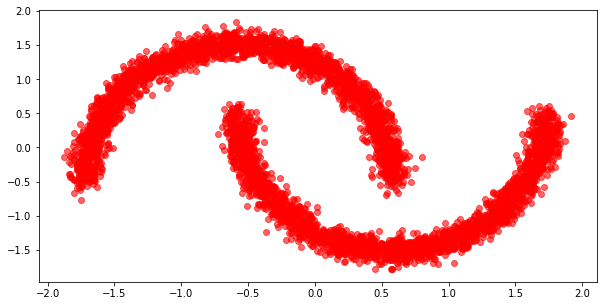

In [9]:
from targets.density_estimation_target import *
num_samples = 50000
target =Moons()
target.target_visual()
target_samples = target.sample(num_samples)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:33<00:00,  2.73s/it, loss = 1.28063]
c:\users\ea264728\pycharmprojects\normalizing_flows\venv\lib\site-packages\torch\functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


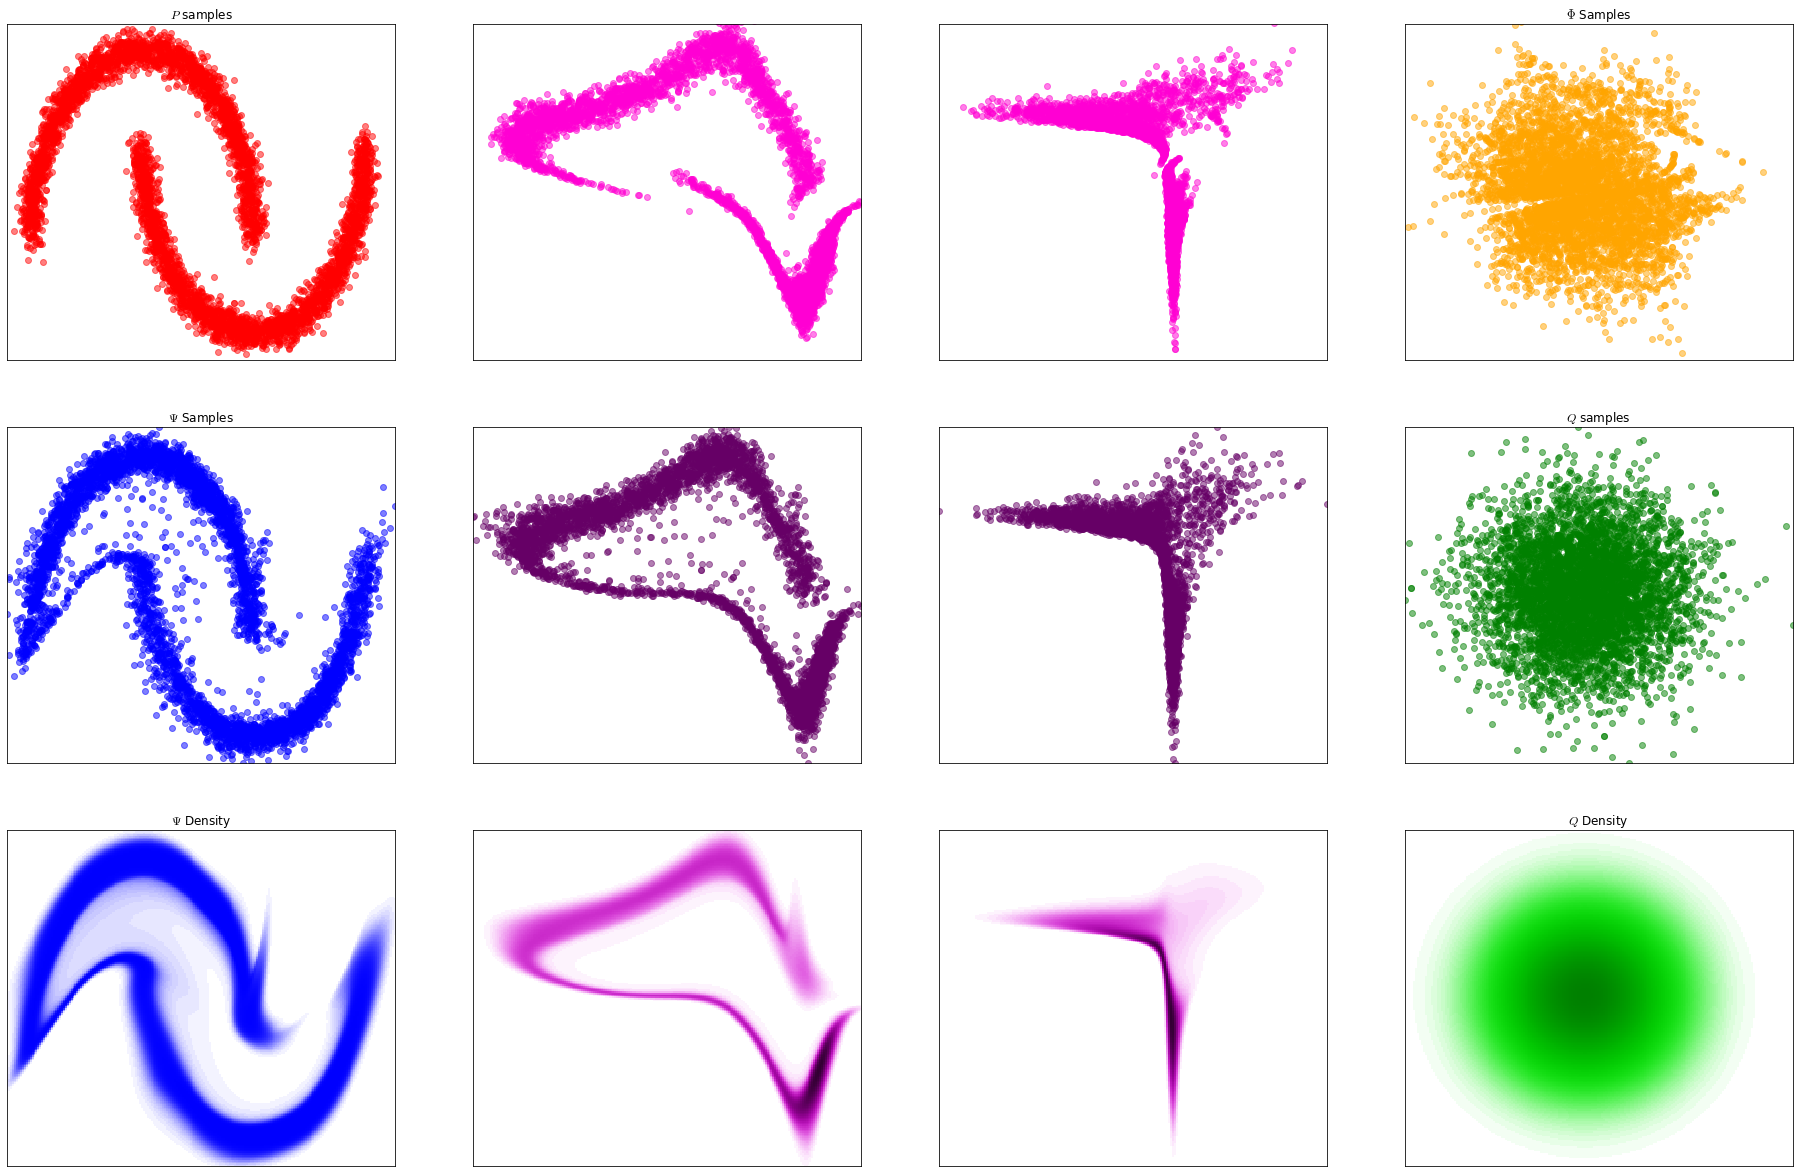

In [10]:
num_samples = target_samples.shape[0]
epochs =100
batch_size = 5000
structure = [[RealNVPDensityEstimatorLayer,[80,80,80]],[RealNVPDensityEstimatorLayer,[80,80,80]],[RealNVPDensityEstimatorLayer,[80,80,80]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs, batch_size)
visual_flow(realnvp)

In [13]:
from targets.variational_inference_target import *
num_samples = 50000
target =Orbits()
target_log_density = target.log_prob
p = target.p

In [15]:
from models_nf import MixedModelSampler,DIFSamplerLayer,RealNVPSamplerLayer

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:01<00:00,  2.41s/it, loss = 4.780625]


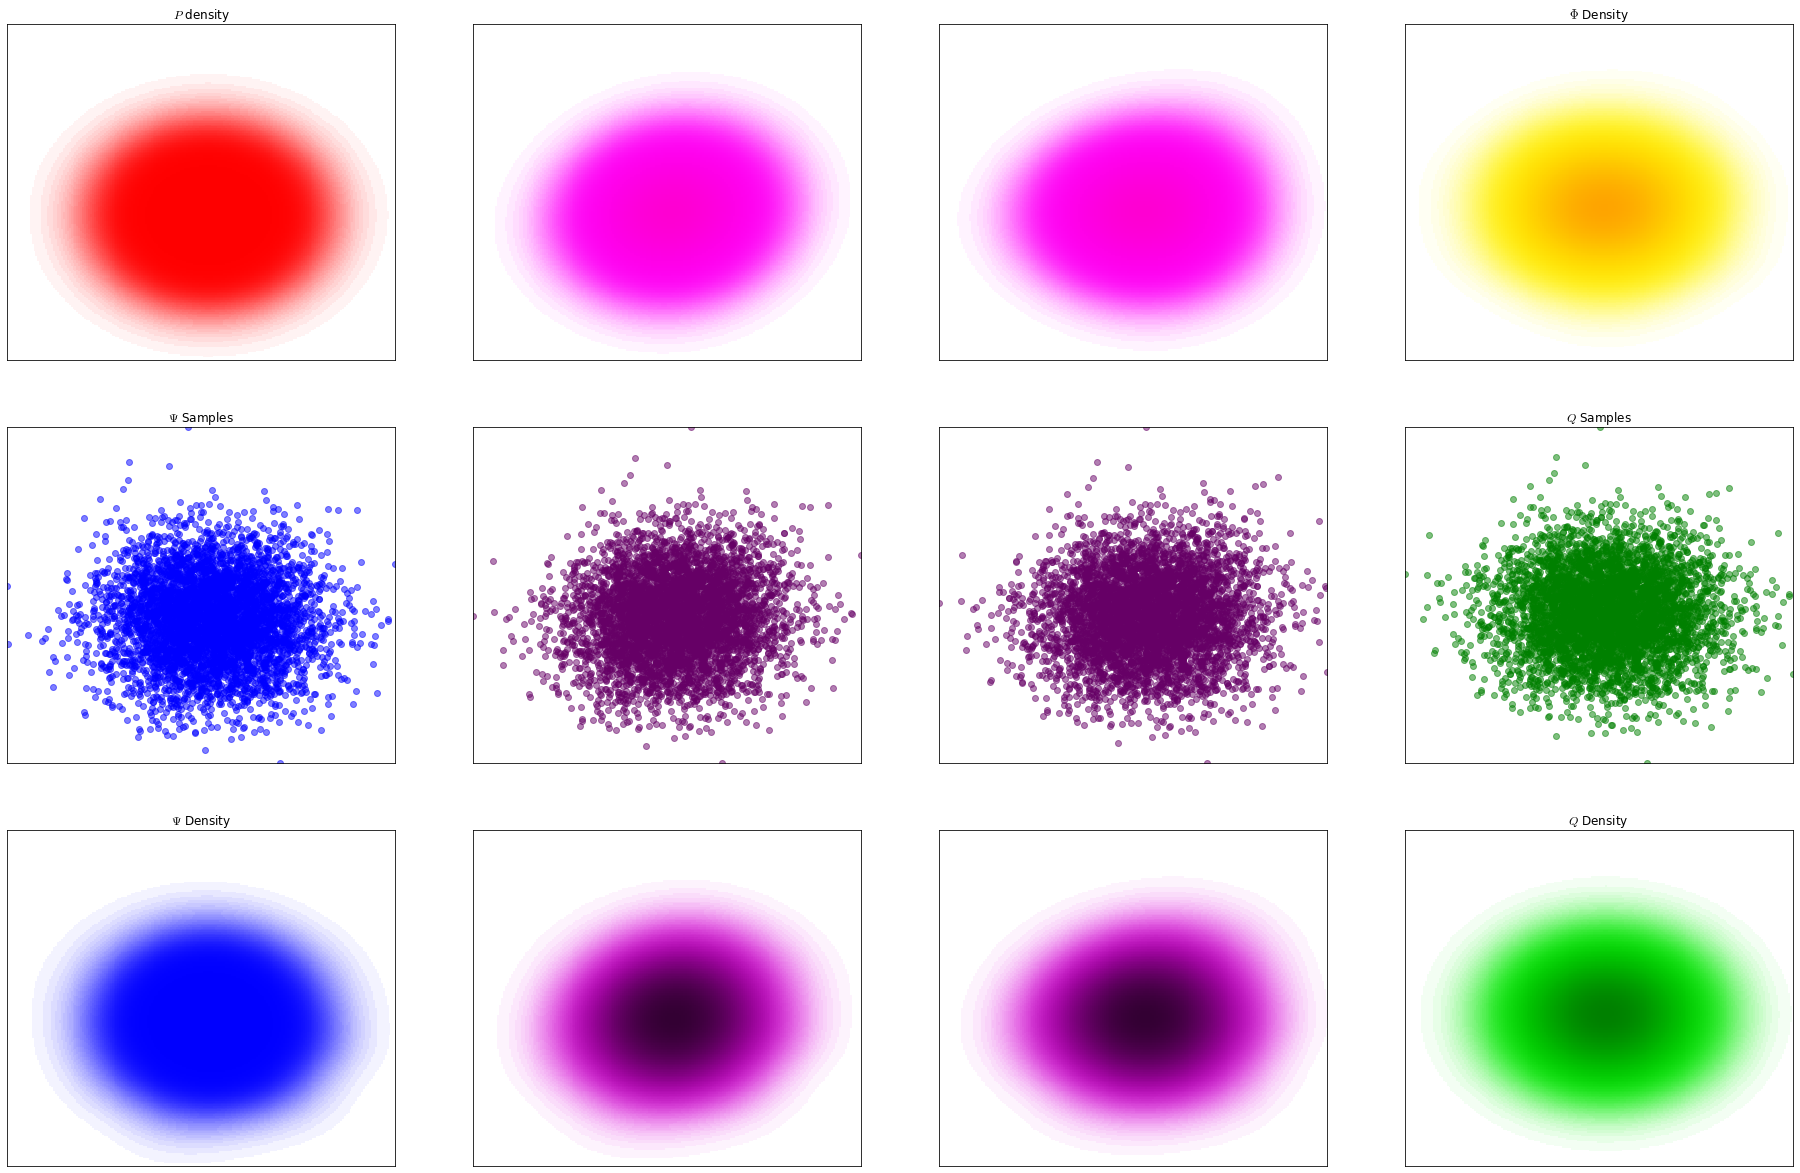

In [16]:
num_samples = target_samples.shape[0]
epochs =100
batch_size = 5000
structure = [[RealNVPSamplerLayer,[80,80,80]],[RealNVPSamplerLayer,[80,80,80]],[RealNVPSamplerLayer,[80,80,80]]]
realnvp = MixedModelSampler(target_log_density,p,structure)
realnvp.train(num_samples, epochs, batch_size)
visual_flow(realnvp)